# Important Libraries ✌️

In [1446]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 

#VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [1447]:
# loading the data set

df=pd.read_csv("day.csv")

In [1448]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1449]:
# checking the number of rows and columns:

df.shape

(730, 16)

In [1450]:
# checking the null counts:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [1451]:
# checking the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1452]:
# checking the numerical data:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1453]:
# dropping first two columns from the dataset:
# instant - because it is the index columns which is of no use as it is unique for all.
# dteday - because month and year column are already present in the data separately.
df = df.drop(["instant", "dteday"], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1454]:
# creating a mapping dictionary

mapping_season = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}

# Map the values in the "season" column

df['season'] = df['season'].map(mapping_season)

In [1455]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1456]:
# creating a mapping dictionary for months

mapping_month = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "June",
    7: "July",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

# Map the values in the "mnth" column

df['mnth'] = df['mnth'].map(mapping_month)

In [1457]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1458]:
# creating a mapping dictionary for weekdays

mapping_weekday= {
    0: "Sun",
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thur",
    5: "Fri",
    6: "Sat"
}

# Map the values in the "weekday" column

df['weekday'] = df['weekday'].map(mapping_weekday)


In [1459]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thur,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1460]:
# create a mapping dictionary for weather conditions

mapping_weather = {
    1: "Clear",
    2: "Mist and Cloudy",
    3: "Light Rain and Snow",
    4: "Heavy Rain and Snow"
}

# Map the values in the "weathersit" column

df['weathersit'] = df['weathersit'].map(mapping_weather)

In [1461]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [1463]:
cat_columns = ["mnth","weathersit","holiday","workingday"]
cont_columns = ["windspeed","temp","registered"]
target= ["cnt"]


# UNIVARIATE ANALYSIS 😯


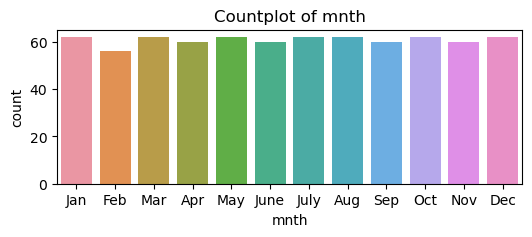

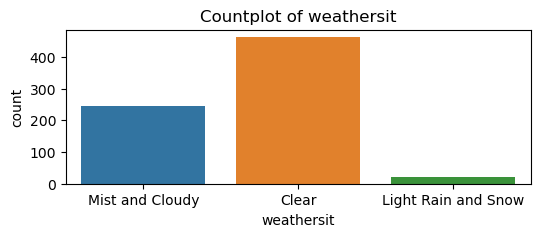

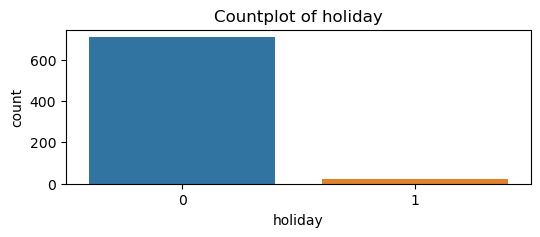

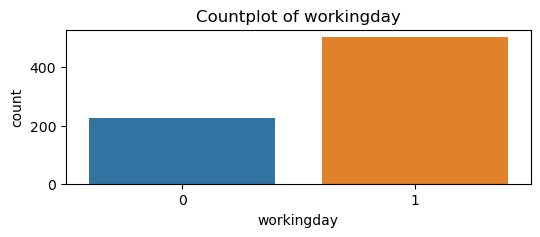

In [1464]:
#Iterate through categorical columns and create countplots

for i in cat_columns:
    plt.figure(figsize=(6, 2))
    sns.countplot(x=df[i])
    plt.title(f'Countplot of {i}')
    plt.show()

In [1465]:
# inferences drawn from the above observations are:
# not much differences can be seen in the month columns. month with lesser number of days have less count.
# clear weather is preferred as compared to mist and clody and rain.
# 0 = no holiday and 1 = holiday it shows people move out more on the weekdays.
# 1 = working day 0 = non working day - it shows people use bikes more on working days.

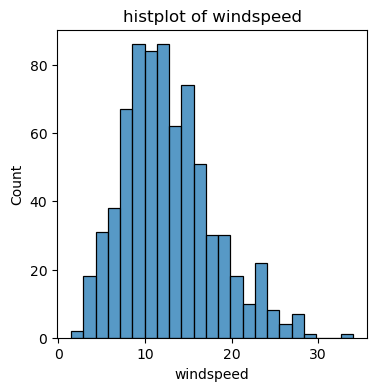

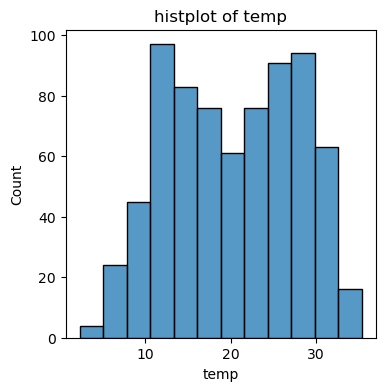

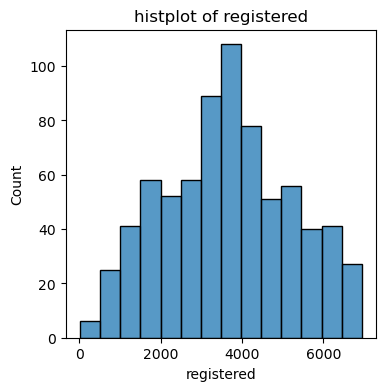

In [1466]:
# Iterate through continuous  columns and create histplots:

for i in cont_columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(x=df[i])
    plt.title(f'histplot of {i}')
    plt.show()

In [1467]:
#inferences drawn from the observations are:
# people prefer bike in moderate windspeed.
# people prefer bike in low temperature or moderately high temperature.
# shows registeration at its peak around 4000 and then it started declining.

# BIVARIATE ANALYSIS 🤓

In [1468]:
cont_columns = ['temp', 'atemp', 'hum', 'windspeed']
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


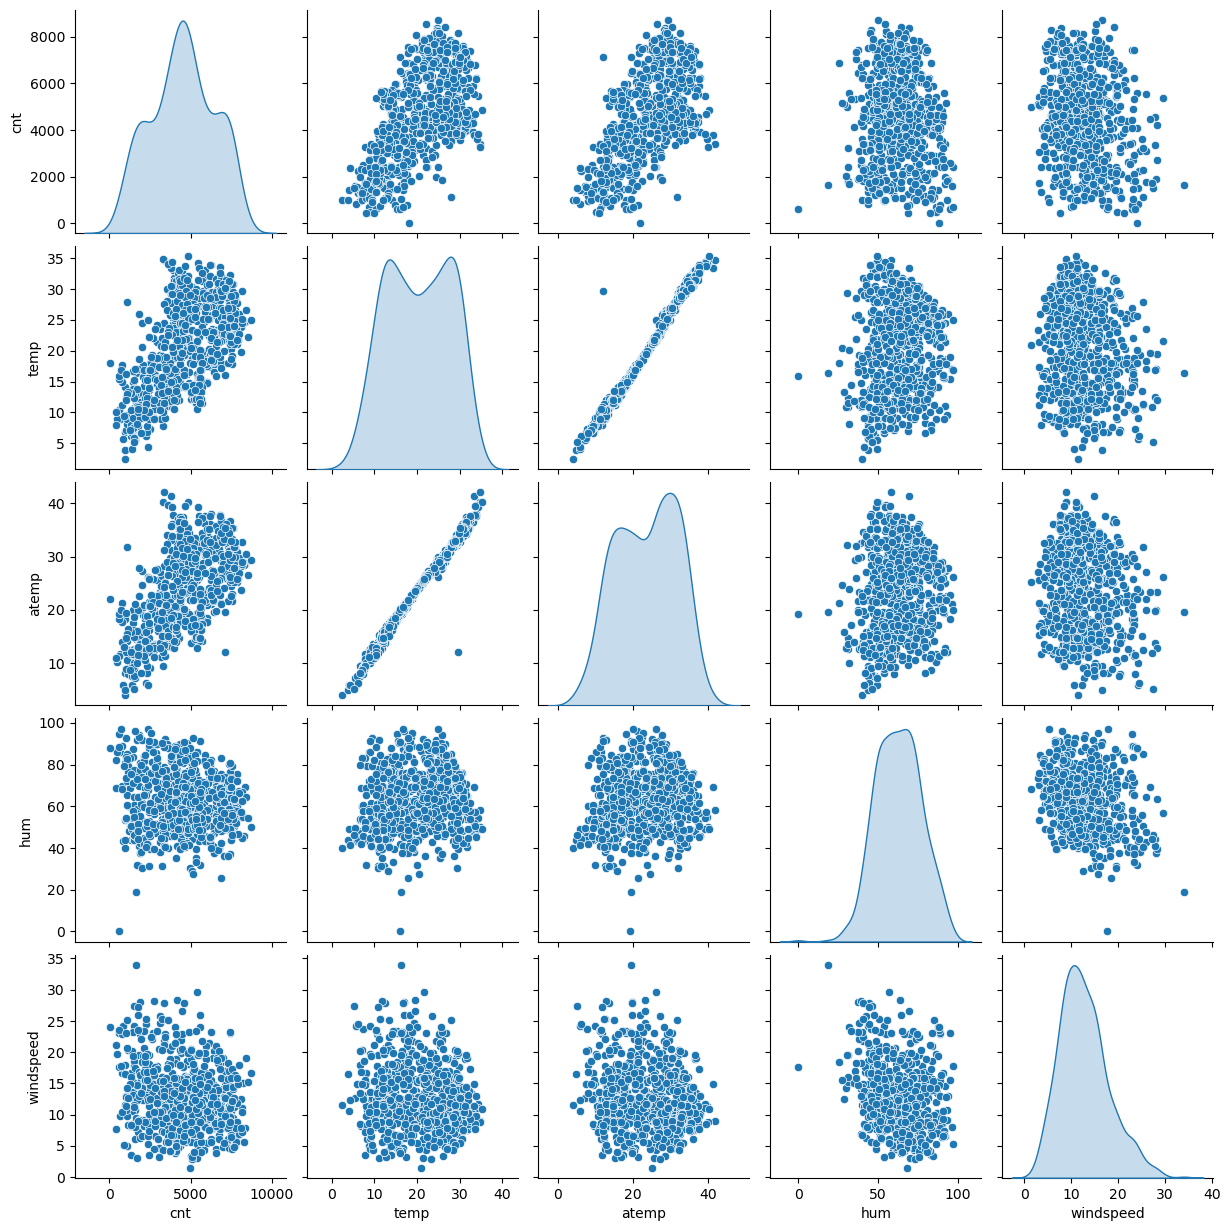

In [1469]:
# Subset the data to include only the specified columns and the target variable 'cnt'

subset_data = df[['cnt'] + cont_columns]

# Create the pair plot

sns.pairplot(subset_data, kind="scatter", diag_kind="kde")
plt.show()


# temp and atemp shows a linear relation with the target variable

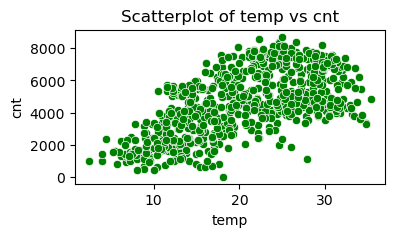

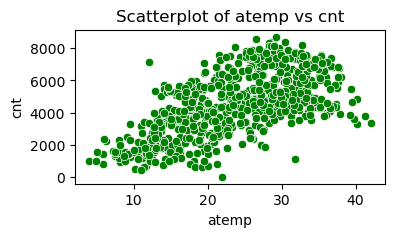

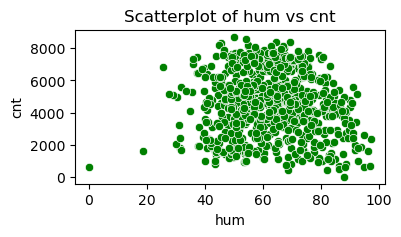

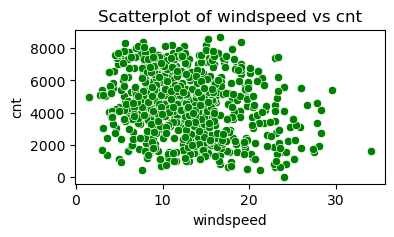

In [1470]:
#bivariate analysis of cnt with continnuous columns:

for i in cont_columns:
    plt.figure(figsize=(4, 2)) 
    sns.scatterplot(x=df[i], y=df["cnt"], c = "green")
    plt.title(f'Scatterplot of {i} vs cnt')
    plt.show()

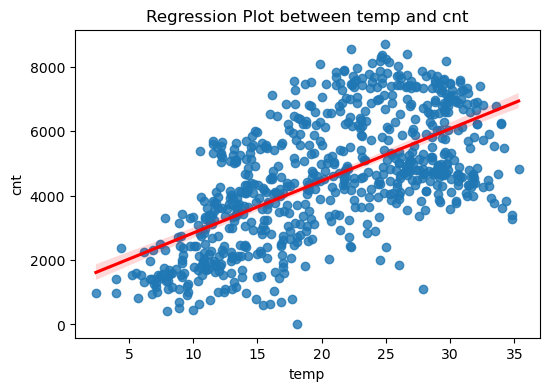

In [1471]:
plt.figure(figsize=(6, 4))
sns.regplot(x=df['temp'], y=df['cnt'], line_kws={'color':'red'})
plt.title('Regression Plot between temp and cnt')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

In [1472]:
# inferences :
# temp  and atemp - As the temperature increases, the number of bike rentals also tends to increase. there is a positive relation.
# humidity - The relationship between humidity and bike demand is not as clear.
# windspeed - on days with extremely high windspeed, the bike demand seems to be lower.

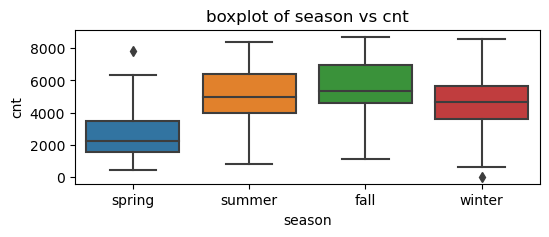

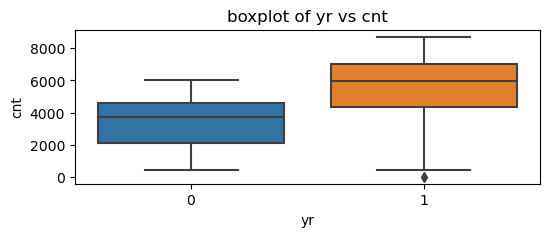

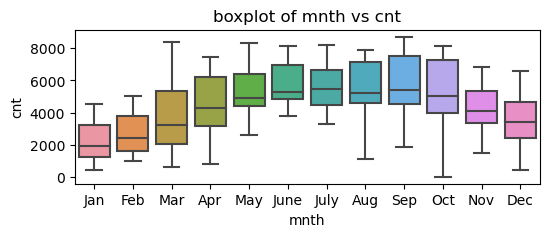

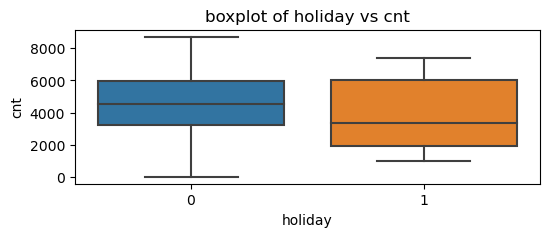

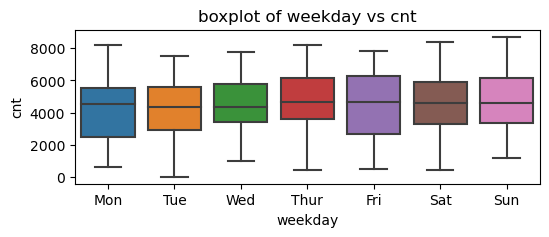

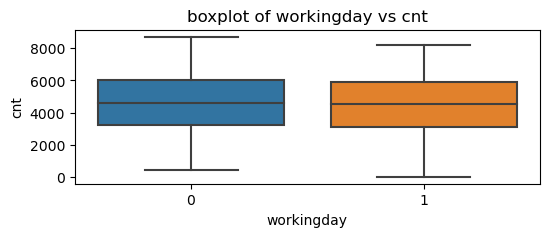

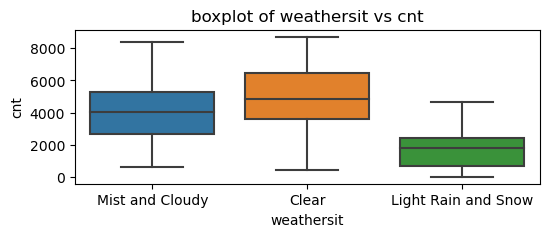

In [1473]:
#bivariate analysis of cnt with categorical columns:

for i in cat_columns:
    plt.figure(figsize=(6, 2))  # Adjust figure size as needed
    sns.boxplot(x=df[i], y=df["cnt"])
    plt.title(f'boxplot of {i} vs cnt')
    plt.show()

In [1474]:
# inferences:
# season - fall has the highest demand, summer and spring has lower demands.
# year - 2019 (1) has the higher median bike demand as compared to 2018 (0).
# month - June to Sep seem to have the highest median bike demand. Jan and Feb have the lowest.
# holiday - Bike demand is slightly lower on holidays compared to non-holidays.
# weekday -  the median demand is slightly higher in the middle of the week.
# workingday -There isn't a significant difference in bike demand between working days and non-working days.
# weather - Clear weather (1) has the highest median bike demand.As the weather becomes less favorable the bike demand decreases

# MULTIVARIATE ANALYSIS 😥

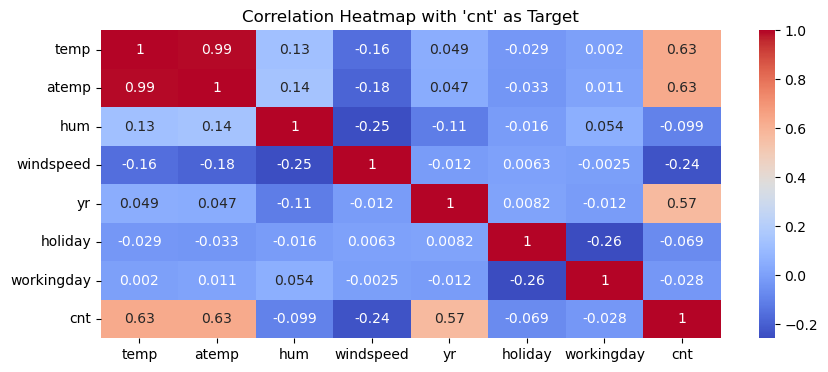

In [1475]:
heatmap_data = df[cont_columns +cat_columns+ ["cnt"]]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Set the figure size
plt.figure(figsize=(10, 4))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Add a title
plt.title("Correlation Heatmap with 'cnt' as Target")

# Show the plot
plt.show()

In [1477]:
# inferences: 
# temp and atemp have a correlation of 0.99, means they provide almost the same information.We can drop one to avoid multicollinearity.
# windspeed and hum (humidity) have a negative correlation with cnt, means, increased wind speed and humidity can decrease the demand for bikes to some extent.
# The yr (year) variable has a positive correlation of 0.57 with cnt, means there can be an increase in bike rentals from 2018 to 2019.


In [1478]:
#It's important to note that casual and registered should not be used as independent variables when predicting cnt, as they directly sum up to cnt. 

df = df.drop(["casual", "registered"], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Dummy Variable Creation 😏

In [1479]:
# creating dummy vars for season 

season_dum = pd.get_dummies(df["season"],drop_first=True)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1480]:
# concatenating the dummies in the main data

df= pd.concat([df,season_dum],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [1481]:
# drop the extra column from which dummy is created

df = df.drop("season",axis=1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [1482]:
# creating dummy vars for mnth 

month_dum = pd.get_dummies(df["mnth"],drop_first=True)
month_dum.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1483]:
# concatenating the dummies in the main data

df= pd.concat([df,month_dum],axis=1)
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [1484]:
# drop the extra column from which dummy is created

df = df.drop("mnth",axis=1)
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [1485]:
# creating dummy vars for weekday 

week_dum = pd.get_dummies(df["weekday"],drop_first=True)
week_dum.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1486]:
# concatenating the dummies in the main data

df= pd.concat([df,week_dum],axis=1)
df.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,Mon,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,Tue,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [1487]:
# drop the extra column from which dummy is created

df = df.drop("weekday",axis=1)
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [1488]:
# creating dummy vars for weekday 

weather_dum = pd.get_dummies(df["weathersit"],drop_first=True)
weather_dum.head()

,Light Rain and Snow,Mist and Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1489]:
# concatenating the dummies in the main data

df= pd.concat([df,weather_dum],axis=1)
df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
0,0,0,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [1490]:
# drop the extra column from which dummy is created

df = df.drop("weathersit",axis=1)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1491]:
df.shape

(730, 30)

# Splitting into Train and Test 😮

In [1492]:
df_train,df_test= train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Scaling the data🤔


In [1493]:
# Initialize the scaler
scaler = MinMaxScaler()

In [1494]:
# scaling all the columns except the 'binary' and 'dummy' variables
cont_vars = ["temp","atemp","hum","windspeed","cnt"]

df_train[cont_vars] = scaler.fit_transform(df_train[cont_vars])

In [1495]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [1496]:
#checking min and max values:

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1497]:
# Scaling the test data 

df_test[cont_vars] = scaler.transform(df_test[cont_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [1498]:
# checking min and max values:

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X and Y sets for model building 😖

In [1499]:
# create sets for train set

y_train = df_train.pop('cnt')
X_train = df_train

In [1500]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [1501]:
X_train.shape

(510, 29)

In [1502]:
# create sets for test set

y_test= df_test.pop('cnt')
X_test = df_test

In [1503]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain and Snow,Mist and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [1504]:
X_test.shape

(220, 29)

# RFE 🤓
Recursive Feature Elimination

In [1505]:
# Initialize the estimator
estimator = LinearRegression()

In [1506]:
select = RFE(estimator, n_features_to_select=13)

In [1507]:
# fit RFE
select = select.fit(X_train, y_train)

In [1508]:
# Get the top features
list(zip(X_train.columns, select.support_,select.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 17),
 ('May', False, 11),
 ('Nov', False, 2),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', False, 10),
 ('Sat', False, 7),
 ('Sun', False, 8),
 ('Thur', False, 16),
 ('Tue', False, 9),
 ('Wed', False, 13),
 ('Light Rain and Snow', True, 1),
 ('Mist and Cloudy', True, 1)]

In [1509]:
#columns supported by RFE

col = X_train.columns[select.support_]

In [1510]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'July', 'Sep', 'Light Rain and Snow',
       'Mist and Cloudy'],
      dtype='object')

In [1511]:
# Columns unsupported by RFE

col1 = X_train.columns[~select.support_]

In [1512]:
col1

Index(['workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

In [1513]:
# creating x_train and x_test dataframe with RFE selected columns


In [1514]:
X_train_rfe = X_train[col]

In [1515]:
X_test_rfe = X_test[col]

# Building model using statsmodel🛠️

In [1516]:
# adding constant to train data

X_train_sm = sm.add_constant(X_train_rfe)

In [1517]:
X_test_sm = sm.add_constant(X_test_rfe) # adding constant to test data

# MODEL 1

In [1518]:
# building model using stats

model_1 = sm.OLS(y_train,X_train_sm)
residual_1 = model_1.fit()
residual_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          7.59e-190
Time:                        20:48:34   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2964      0.035      8.483      0.000       0.228       0.365
yr                      0.2301      0.008     28.339      0.000       0.214       0.246
holiday                -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp                    0.5124      0.035     14.706      0.000       0.444       0.581
hum                    -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed              -0.1874      0.026     -7.253      0.000      -0.238      -0.137
spring                 -0.0519      0.021     -2.476      0.014      -0.093      -0.011
summer                  0.0502      0.015      3.336      0.001       0.021       0.080
winter                  0.0919      0.018      5.247      0.000       0.057       0.126
Jan                    -0.0333      0.018     -1.892      0.059      -0.068       0.001
July                   -0.0556      0.018     -3.039      0.003      -0.092      -0.020
Sep                     0.0827      0.017      4.951      0.000       0.050       0.116
Light Rain and Snow    -0.2392      0.026     -9.084      0.000      -0.291      -0.187
Mist and Cloudy        -0.0526      0.010     -5.025      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1519]:
# dropping the columnn from train set with p value more that 0.05.

X_train_sm = X_train_sm.drop(["Jan"],axis=1)

In [1520]:
X_train_sm.columns # check the column dropped

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Light Rain and Snow',
       'Mist and Cloudy'],
      dtype='object')

In [1521]:
# dropping the columnn from test set with p value more that 0.05.

X_test_sm = X_test_sm.drop(["Jan"], axis=1)

In [1522]:
X_test_sm.columns # check the column dropped

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Light Rain and Snow',
       'Mist and Cloudy'],
      dtype='object')

# MODEL 2

In [1523]:
# adding constant to train data

X_train_sm = sm.add_constant(X_train_sm)

In [1524]:
X_test_sm = sm.add_constant(X_test_sm) # adding constant to test data

In [1525]:

model_2 = sm.OLS(y_train,X_train_sm)
residual_2 = model_2.fit()
residual_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.95e-190
Time:                        20:48:34   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2848      0.034      8.258      0.000       0.217       0.353
yr                      0.2294      0.008     28.208      0.000       0.213       0.245
holiday                -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                    0.5299      0.034     15.728      0.000       0.464       0.596
hum                    -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed              -0.1822      0.026     -7.074      0.000      -0.233      -0.132
spring                 -0.0564      0.021     -2.700      0.007      -0.097      -0.015
summer                  0.0531      0.015      3.536      0.000       0.024       0.083
winter                  0.0976      0.017      5.643      0.000       0.064       0.132
July                   -0.0572      0.018     -3.123      0.002      -0.093      -0.021
Sep                     0.0833      0.017      4.973      0.000       0.050       0.116
Light Rain and Snow    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
Mist and Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1526]:
# dropping Jan was a good decision as there is not much difference in R - squared and adj - R squared value.

In [1527]:
# check the multicollinearity through VIF(VARIANCE INFLATION FACTOR)

X_train_sm = X_train_sm.drop(["const"], axis=1)
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["vif"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif["vif"]= round(vif["vif"],2)
vif = vif.sort_values(by = "vif", ascending = False)
vif


,features,vif
3,hum,28.03
2,temp,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
11,Mist and Cloudy,2.28
0,yr,2.08
8,July,1.58
9,Sep,1.38


In [1528]:
# dropping humidity as it's VIF is higher than the threshold point 5-10

In [1529]:
# drop column with high vif - train data
X_train_sm = X_train_sm.drop(["hum"],axis=1)


In [1530]:
# drop column with high vif - test data 

X_test_sm = X_test_sm.drop(["hum"],axis=1)

# MODEL 3

In [1531]:
# adding constant to train data

X_train_sm = sm.add_constant(X_train_sm)


model_3 = sm.OLS(y_train,X_train_sm)
residual_3 = model_3.fit()
residual_3.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          5.06e-187
Time:                        20:48:34   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1994      0.030      6.746      0.000       0.141       0.258
yr                      0.2336      0.008     28.352      0.000       0.217       0.250
holiday                -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                    0.4910      0.033     14.770      0.000       0.426       0.556
windspeed              -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring                 -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer                  0.0465      0.015      3.051      0.002       0.017       0.076
winter                  0.0817      0.017      4.730      0.000       0.048       0.116
July                   -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep                     0.0768      0.017      4.517      0.000       0.043       0.110
Light Rain and Snow    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist and Cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1532]:
# ADDING CONSTANT TO TEST DATA

X_test_sm = sm.add_constant(X_test_sm)

In [1533]:
# P VALUES OF ALL THE VARIABLES ARE LESS THAN 0.05, NOW CHECK THE MULTICOLLINEARITY THROUGH VIF

In [1534]:
# check the multicollinearity through VIF(VARIANCE INFLATION FACTOR)

X_train_sm = X_train_sm.drop(["const"], axis=1)
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["vif"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif["vif"]= round(vif["vif"],2)
vif = vif.sort_values(by = "vif", ascending = False)
vif


,features,vif
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,July,1.58
10,Mist and Cloudy,1.55
8,Sep,1.34
9,Light Rain and Snow,1.08


In [1535]:
# here we can observe that VIF of TEMP = 5.09, which can be dropped but after dropping the Temp variable the R-squared and Adj. Rsquared value is dropping from 83.5 to 76.3.

# As we can see that Temp has very significant effect on the model so dropping this variable is notgood for the model's performance.

# hence dropping windspeed whose VIF is near to 5.

In [1536]:
# drop column with high vif - train data

X_train_sm = X_train_sm.drop(["windspeed"],axis=1)


# drop column with high vif - test data 

X_test_sm = X_test_sm.drop(["windspeed"],axis=1)


# MODEL 4 😐

In [1537]:
# adding constant to train data

X_train_sm = sm.add_constant(X_train_sm)


model_4 = sm.OLS(y_train,X_train_sm)
residual_4 = model_4.fit()
residual_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          5.71e-181
Time:                        20:48:34   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1501      0.029      5.124      0.000       0.093       0.208
yr                      0.2326      0.009     27.333      0.000       0.216       0.249
holiday                -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temp                    0.5029      0.034     14.670      0.000       0.436       0.570
spring                 -0.0766      0.022     -3.514      0.000      -0.119      -0.034
summer                  0.0367      0.016      2.342      0.020       0.006       0.067
winter                  0.0829      0.018      4.642      0.000       0.048       0.118
July                   -0.0523      0.019     -2.715      0.007      -0.090      -0.014
Sep                     0.0812      0.018      4.623      0.000       0.047       0.116
Light Rain and Snow    -0.2989      0.025    -11.756      0.000      -0.349      -0.249
Mist and Cloudy        -0.0785      0.009     -8.669      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1538]:
# adding constant to the test set

X_test_sm = sm.add_constant(X_test_sm)

In [1539]:
# check the multicollinearity through VIF(VARIANCE INFLATION FACTOR)

X_train_sm = X_train_sm.drop(["const"], axis=1)
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["vif"] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif["vif"]= round(vif["vif"],2)
vif = vif.sort_values(by = "vif", ascending = False)
vif


,features,vif
2,temp,4.22
0,yr,2.06
4,summer,1.94
6,July,1.58
5,winter,1.57
9,Mist and Cloudy,1.55
3,spring,1.40
7,Sep,1.34
8,Light Rain and Snow,1.07
1,holiday,1.04


In [1540]:
# Light Rain and Snow (VIF = 1.07) and holiday (VIF = 1.04): These features have VIF values close to 1, which is ideal. It indicates that these variables have very little or no multicollinearity with other features in the model.

# yr (VIF = 2.06), summer (VIF = 1.94), and other features with VIF < 5: These features have moderate VIF values, suggesting that there might be some mild correlations with other variables, but they are within acceptable limits.

# temp (VIF = 4.22): This is the highest VIF value among the features but still it's below the 5-10, it's still high. This suggests that the 'temp' feature might have some correlation with other features in the dataset, but it's not very bad.





# RESIDUAL ANASYSIS🤩

In [1541]:
# finding the y predictive from the trained model

X_train_sm = sm.add_constant(X_train_sm)
y_train_pred = residual_4.predict(X_train_sm)

In [1542]:
# calculating the residuals

res = (y_train-y_train_pred)
res

576    0.087357
426    0.015138
728   -0.225259
482   -0.056884
111   -0.091098
         ...   
578    0.015652
53     0.042625
350    0.033253
79    -0.104529
520    0.160190
Length: 510, dtype: float64

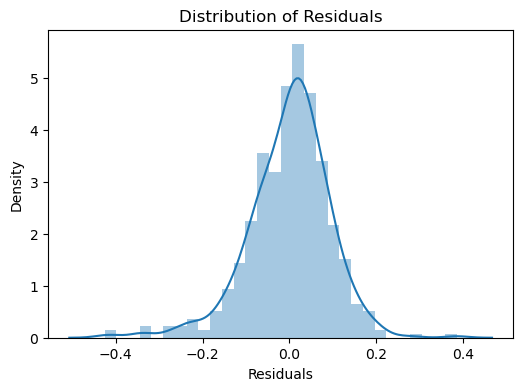

In [1543]:
# Normalization of Errors 
# plot a distrivution plot of residuals to check the normality of errors

plt.figure(figsize=(6 ,4))
sns.distplot(res)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# It is clear from the plot that the assumption of normality is made in the train set as the error terms follow a normal distribution with mean equal to zero.

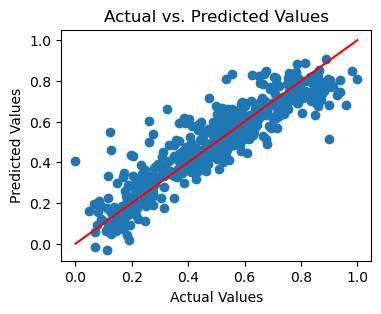

In [1544]:
# linearity 
# Plot a scatterplot between the predicted values and the actual values to confirm linearity of the model.

y_train_pred = residual_4.predict(X_train_sm)  
y_actual = y_train  

plt.figure(figsize=(4, 3))
plt.scatter(y_actual, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red')  # Diagonal line
plt.show()

In [1545]:
# The red diagonal line in the plot represents the line where the predicted values are exactly equal to the actual values.
# it suggests that the model's predictions are linearly related to the actual values.


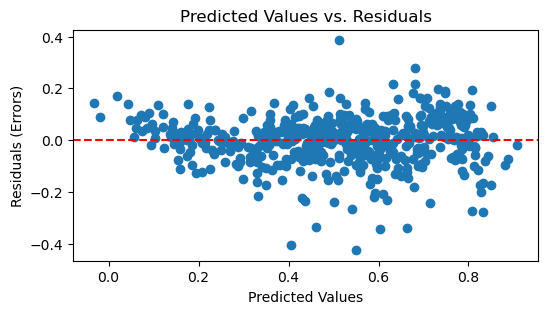

In [1546]:
# Independence of Errors
# Plotting the residuals (errors) against the predicted values.

res = (y_train-y_train_pred)


plt.figure(figsize=(6, 3))
plt.scatter(y_train_pred, res)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Predicted Values vs. Residuals')
plt.show()

In [1547]:
# plot shows a random distribution around the horizontal line at 0 means that the residuals are independent, there's no clear pattern or trend.


# Evaluation on test set🤞

In [1548]:
# finding the y predictive of the test set fromm the model obtained in training 

y_test_pred = residual_4.predict(X_test_sm)
y_test_pred

184    0.337341
535    0.872633
299    0.411976
221    0.593462
152    0.597735
         ...   
702    0.726687
127    0.480760
640    0.762071
72     0.240236
653    0.721987
Length: 220, dtype: float64

In [1549]:
# calculating the residuals of test set

res_test = (y_test- y_test_pred)

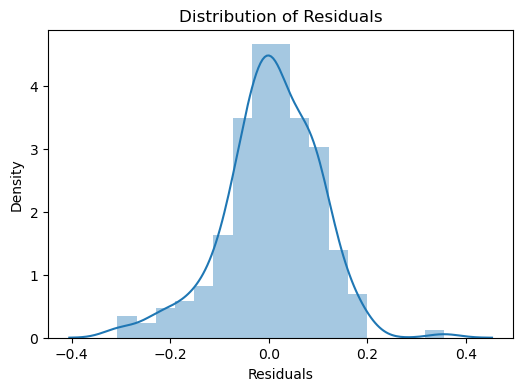

In [1550]:
# 4. Normalization of Errors on test set

plt.figure(figsize=(6 ,4))
sns.distplot(res_test)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# It is clear from the plot that the assumption of normality is made in the test set as the error terms follow a normal distribution with mean equal to zero.

In [1551]:
from sklearn.metrics import r2_score


# Actual and predicted values of test set 
y_true = y_test
y_pred = y_test_pred


# calculate R-squared
r_squared = r2_score(y_true,y_pred)


# samples(n) and predictor variable (p) for adj R- squared
n = X_test_sm.shape[0]
p = X_test_sm.shape[1]

# calculate Adj R- squared
adj_r_squared = 1-((1-r_squared) *  (n-1) / (n-p-1))


print("R- Squared for test data:", r_squared)
print("Adjusted R- Squared for test data:", adj_r_squared)




R- Squared for test data: 0.8092660294132242
Adjusted R- Squared for test data: 0.799179136737962


In [1552]:
# train set R-SQUARED =0.824 and Adj R-Squared =0.820
# test set R-SQUARED =0.809 and Adj R-Squared =0.799

In [1553]:
# Model Fit: The model explains 82.4% of the variance of the dependent variable for the training set and 80.9% for the test set which indicates a strong fit.

# Relevance of Predictors: The closeness of R-Squared and Adj R- Squared inn both the sets tells us that the predictors are relevantwhich explains the variance well.

# Generalization: The small decrease in R- Squared from ttrain set (0.835) to the test set (0.809) shows that the model generalizes well to the new data and is not overfitting.

# Conclusion: 
# The model is well-fitted 
# Uses of relevant predictors are performed consistently on new data. 

# These are the top 10 variables that have a significant effect on the demand of shared bikes temp, yr ,summer ,July ,winter ,Mist and Cloudy ,spring ,Sep ,Light Rain and Snow, holiday